## Simple Hand Written Numbers Classifier

Another classification example to recognize hand written numbers. Trained using MNIST dataset.

After training the model, you can use Sample_Sketching sketch in Processing to write numbers and see the results here.

In [ ]:
#install a required library to use OSC protocol
!pip install https://github.com/attwad/python-osc/archive/master.zip
!pip install matplotlib

In [78]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

def create_model(nbclasses,firstLayer,nlayers):
    model=models.Sequential()
    model.add(layers.Dense(firstLayer,activation='relu',input_shape=(784,)))
    for l in nlayers:
        model.add(layers.Dense(l,activation='relu'))
    model.add(layers.Dense(nbclasses,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

In [93]:
#setup training data. Here we using MNIST dataset for numbers
# the training set is 28x28 input, and a number 0~9 as output

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

mean=np.mean(x_train)
std=np.std(x_train)

print("Data Mean: {0}, STD:{1}".format(mean,std))

#scale training input from 0~255 -> 0~1 by dividing on 255 
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

nb_classes=10

#convert the input from 2D arrays to 1D arrays
X_train = x_train.reshape(x_train.shape[0], 28*28)
X_test = x_test.reshape(x_test.shape[0], 28*28)

#convert numbers output to one-hot encoding
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

Data Mean: 33.318421449829934, STD:78.56748998339798


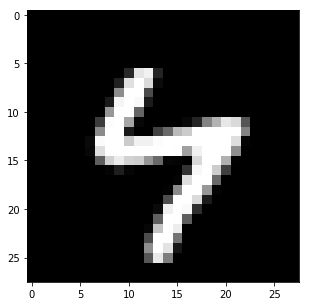

In [54]:

fig=plt.figure(figsize=(5,5))

index=random.randint(0,len(X_train)-1)
plt.imshow(x_train[index],cmap='gray',interpolation='nearest')
plt.savefig("digit.png", bbox_inches='tight')
plt.show()

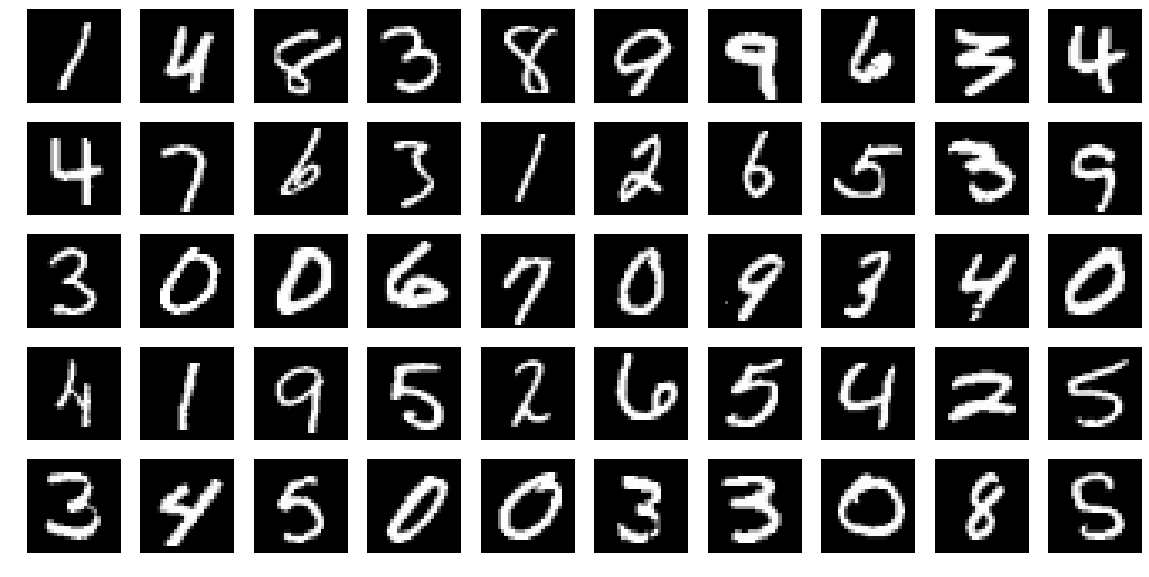

In [13]:
#plot an example image from the dataset
%matplotlib inline
import matplotlib.pyplot as plt
import random


cols=10
rows=5

fig=plt.figure(figsize=(cols*2, rows*2))

for i in range(1,cols*rows+1):
    index=random.randint(0,len(X_train)-1)
    fig.add_subplot(rows,cols,i)
    plt.axis('off')
    plt.imshow(x_train[index],cmap='gray',interpolation='nearest')
    
plt.savefig("mnist.png", bbox_inches='tight')
plt.show()

In [90]:

from tensorflow.keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

TrainModel=True #Set to False to load pretrained model


if TrainModel:
    #Either train your own model
    model=create_model(nb_classes,64,[64,32,16])
    history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=128, callbacks=[tensorboard])
else:
    #or just load a pretrained model (trained for model arch (64,[64,32,16]) with 97% accuracy)
    model=create_model(nb_classes,64,[64,32,16]) #Don't change the layers
    model.load_weights("model.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_88 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_90 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_91 (Dense)             (None, 10)                170       
Total params: 57,178
Trainable params: 57,178
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3808 - 

In [ ]:
#setup OSC Protocol to communicate with Processing
import OSCHelper
server=OSCHelper.createServer(9000)

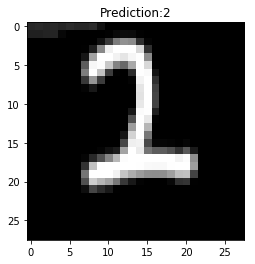

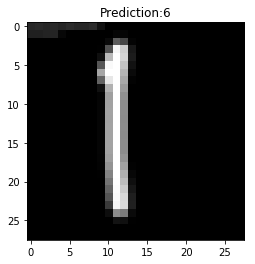

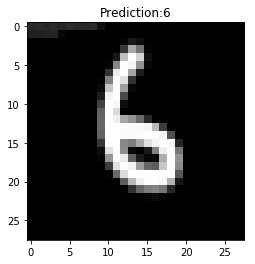

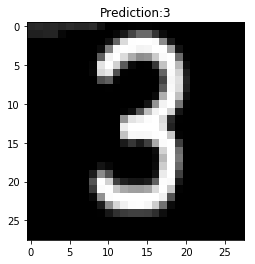

In [53]:
import numpy as np

def onOSC_Image(*args):
    width=args[1]
    height=args[2]
    args=np.array(list(args[3])).astype(float)
    args=args/255.0
    img=np.reshape(args,(width,height))
    x=np.reshape(img,(width*height))
    res=model.predict(np.array([x]))
    plt.imshow(img,cmap='gray')
    plt.title("Prediction:{0}".format(np.argmax(res)))
    plt.show()

server.addMsgHandler( "/inputs/image", onOSC_Image )

OSCHelper.start_server(server)


In [54]:
server.close()
